<a href="https://colab.research.google.com/github/Snehakhot/Practo_Internship/blob/main/Output_Submission_Sneha_Patil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install plotnine


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
from plotnine import ggplot, aes, geom_bar, labs, theme_minimal, theme, element_text
# Load the data from a CSV file
data = pd.read_csv('Recruitment_Data.csv')

# Display the first few rows of the dataframe
print(data.head())


   attrition  performance_rating  sales_quota_pct recruiting_source
0          1                   3         1.088190    Applied Online
1          0                   3         2.394173               NaN
2          1                   2         0.497530            Campus
3          0                   2         2.513958               NaN
4          0                   3         1.424789    Applied Online


In [ ]:
# Check for missing values in each column
missing_values = data.isnull().sum()

# Print the number of missing values for each column
print("Number of missing values in each column:")
print(missing_values)

Number of missing values in each column:
attrition               0
performance_rating      0
sales_quota_pct         0
recruiting_source     205
dtype: int64


In [ ]:
# Most common value (mode) in the recruiting_source column
mode_value = data['recruiting_source'].mode()[0]

# Fill missing values with the mode
data['recruiting_source'].fillna(mode_value, inplace=True)

# Verify the missing values are filled
print("Updated missing values in each column:")
print(data.isnull().sum())


Updated missing values in each column:
attrition             0
performance_rating    0
sales_quota_pct       0
recruiting_source     0
dtype: int64


This code snippet replaces missing values in the recruiting_source column with the most common source used in the dataset, thus preserving all rows for a more comprehensive analysis. Adjust the imputation strategy based on your specific analytical needs and domain knowledge.

In [ ]:
# Assuming missing values have already been handled, we will group the data by 'recruiting_source'
grouped_data = data.groupby('recruiting_source')

# Calculate mean performance rating, mean sales quota percentage, and attrition rate for each group
performance_avg = grouped_data['performance_rating'].mean()
sales_quota_avg = grouped_data['sales_quota_pct'].mean()
attrition_rate = grouped_data['attrition'].mean()  # Assuming attrition is coded as 1 for yes, 0 for no

# Combine these metrics into a single DataFrame for easier comparison
summary_stats = pd.DataFrame({
    'Average Performance Rating': performance_avg,
    'Average Sales Quota Percentage': sales_quota_avg,
    'Attrition Rate': attrition_rate
})

# Display the summary statistics for each recruitment source
print(summary_stats.sort_values(by='Average Performance Rating', ascending=False))

                   Average Performance Rating  Average Sales Quota Percentage  \
recruiting_source                                                               
Campus                               2.928571                        0.908035   
Applied Online                       2.901493                        1.125609   
Referral                             2.844444                        1.023198   
Search Firm                          2.700000                        0.886960   

                   Attrition Rate  
recruiting_source                  
Campus                   0.285714  
Applied Online           0.176119  
Referral                 0.333333  
Search Firm              0.500000  


Interpretation:
Performance: Candidates recruited from Campus and Applied Online tend to have higher performance ratings.
Sales Quota Achievement: Candidates from Applied Online show the highest sales quota achievement.
Attrition Rate: Search Firm has the highest attrition rate, making it the least preferable in terms of retention. Applied Online shows the lowest attrition rate, suggesting better retention.

In [ ]:
# Calculate the average sales quota percentage (used as Sales Numbers) and attrition rate for each recruiting source
average_sales = grouped_data['sales_quota_pct'].mean()
average_attrition = grouped_data['attrition'].mean()

# Creating a DataFrame to display the results more clearly
recruitment_performance = pd.DataFrame({
    'Average Sales Numbers': average_sales,
    'Average Attrition Numbers': average_attrition
})

# Printing out the average Sales Numbers and Attrition Numbers grouped by Recruiting Source
print("Average Sales and Attrition Numbers by Recruiting Source:")
print(recruitment_performance.sort_values(by=['Average Sales Numbers', 'Average Attrition Numbers'], ascending=[False, True]))

Average Sales and Attrition Numbers by Recruiting Source:
                   Average Sales Numbers  Average Attrition Numbers
recruiting_source                                                  
Applied Online                  1.125609                   0.176119
Referral                        1.023198                   0.333333
Campus                          0.908035                   0.285714
Search Firm                     0.886960                   0.500000


**Interpretation:**

- **Applied Online** is the best recruitment source, with the highest sales and lowest attrition rates, indicating high performance and good retention.
- **Referral** recruits perform well but have a higher attrition rate, suggesting retention issues.
- **Campus** recruits show decent performance and moderate attrition, hinting at the potential for further development.
- **Search Firm** is the least effective, with the lowest sales and highest attrition, suggesting a need for evaluation and possibly redefined hiring strategies from this source.

  recruiting_source  attrition
0    Applied Online   0.176119
1            Campus   0.285714
2          Referral   0.333333
3       Search Firm   0.500000


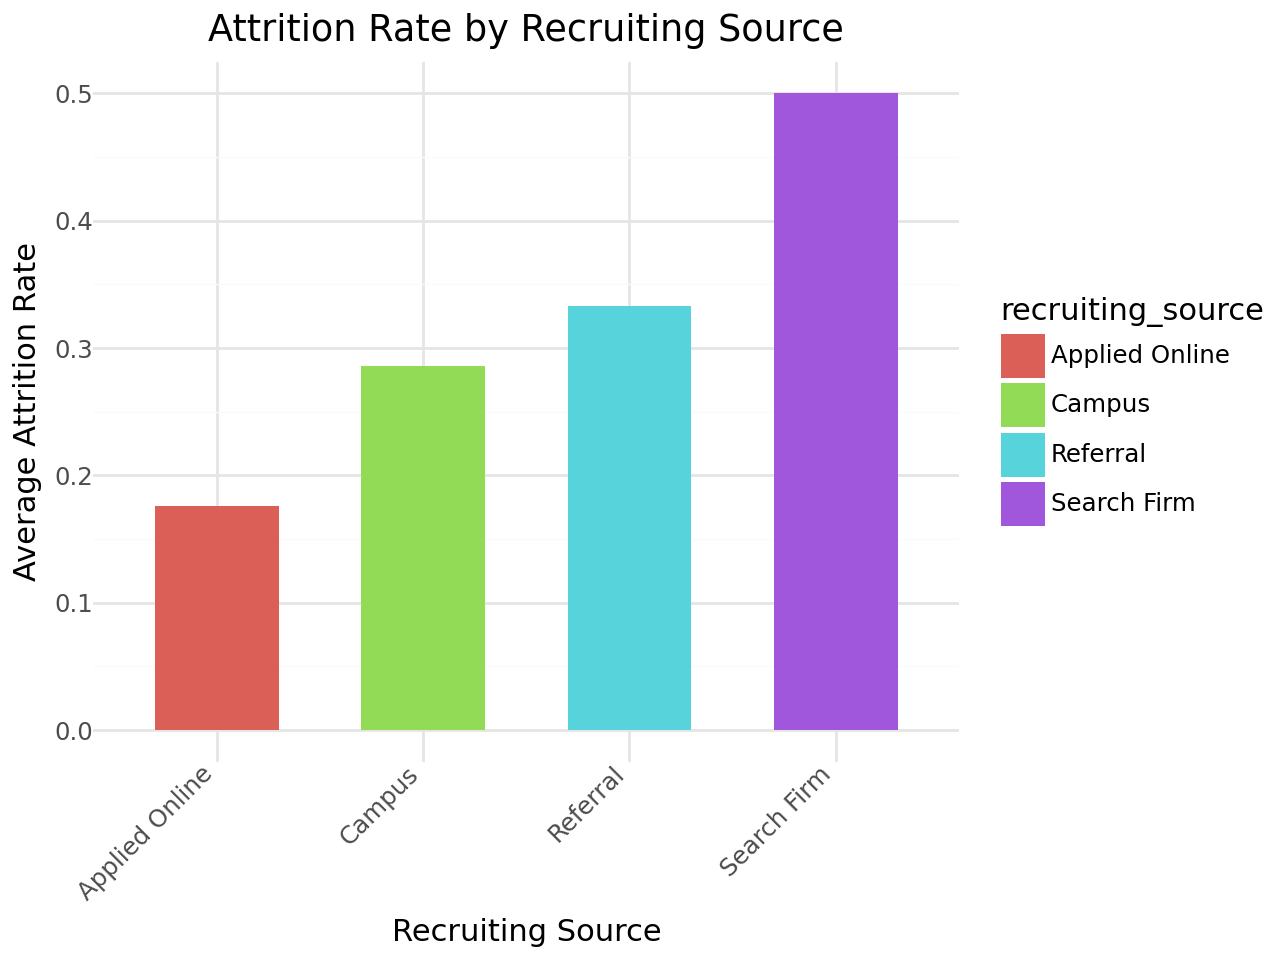

In [ ]:
# Properly create a DataFrame from groupby operation
grouped_data = data.groupby('recruiting_source', as_index=False).agg({'attrition': 'mean'})

# Ensure grouped_data is a DataFrame and has been reset properly if needed

print(grouped_data.head())  # Preview to ensure it looks correct

# Plotting
plot = (ggplot(grouped_data, aes(x='recruiting_source', y='attrition', fill='recruiting_source'))
        + geom_bar(stat='identity', width=0.6)  # 'identity' to use the actual y values
        + labs(x='Recruiting Source', y='Average Attrition Rate', title='Attrition Rate by Recruiting Source')
        + theme_minimal()
        + theme(axis_text_x=element_text(rotation=45, hjust=1)))  # Rotate x labels for better readability

# Display the plot
plot

### Attrition Rate Insights:

- **Applied Online (0.176)**: Lowest attrition rate, highlighting its effectiveness in securing candidates with better job alignment and long-term retention.

- **Campus (0.286)**: Moderate attrition suggests that while campus recruits are valuable, they might benefit from more comprehensive integration and development initiatives.

- **Referral (0.333)**: Higher than expected attrition rates, indicating possible gaps in expectation management; enhanced role clarity during the referral process may mitigate this.

- **Search Firm (0.500)**: The highest attrition rate, signaling a need to reassess how these partnerships align with the company’s needs and candidate expectations.

### Recommendations:

- **Enhance Online Recruitment**: Capitalize on its success to further reduce turnover.

- **Strengthen Campus Engagement**: Focus on tailored orientation and mentoring programs to improve retention.

- **Optimize Referral Processes**: Ensure clear communication of job expectations to align candidate expectations.

- **Reevaluate Search Firm Strategies**: Critically review search firm relations to ensure better candidate-job alignment.

  recruiting_source  sales_quota_pct
0    Applied Online         1.125609
1            Campus         0.908035
2          Referral         1.023198
3       Search Firm         0.886960


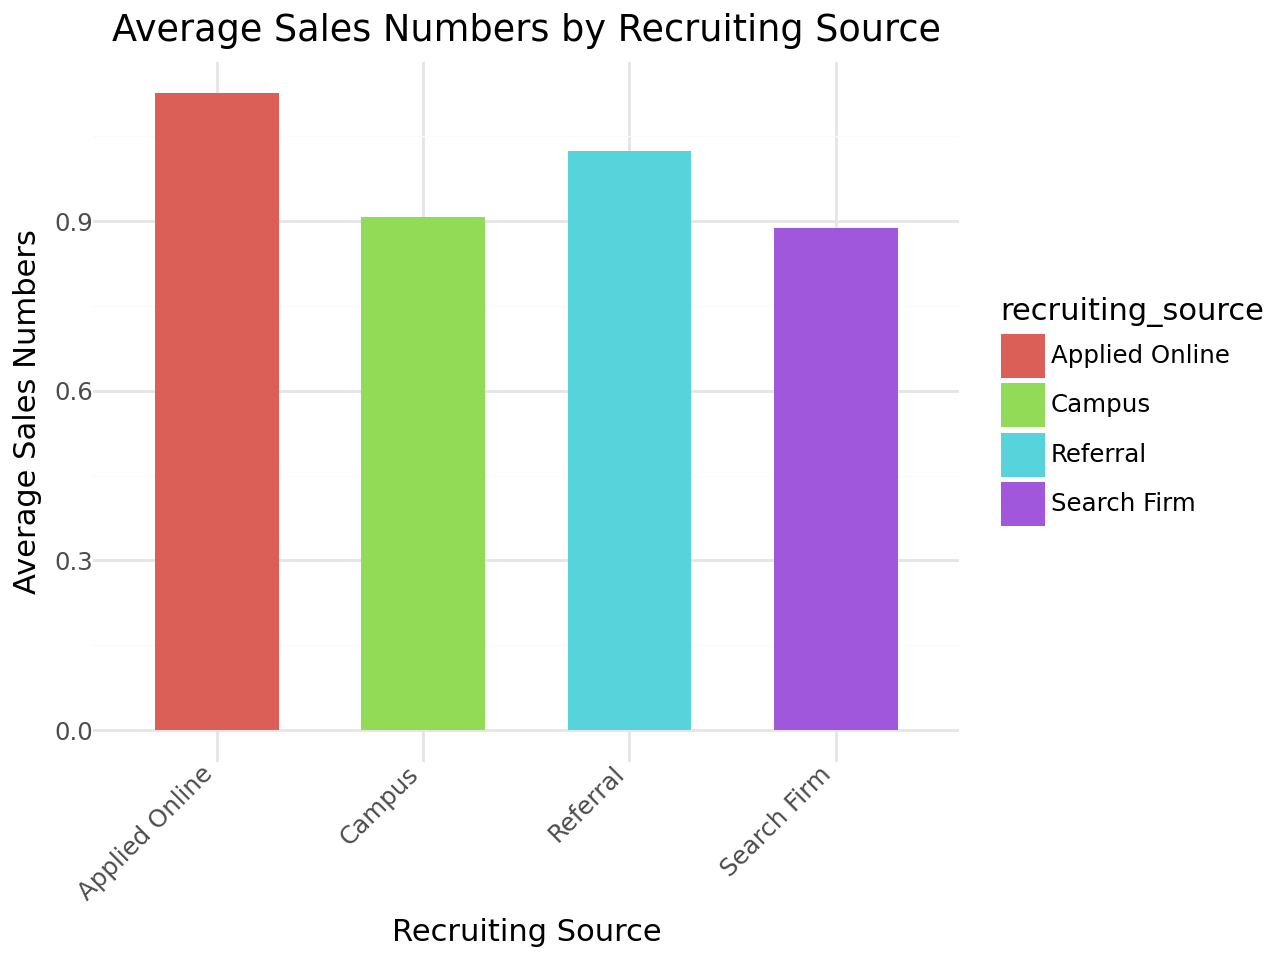

In [ ]:
grouped_data = data.groupby('recruiting_source', as_index=False)['sales_quota_pct'].mean()
print(grouped_data.head())  # Preview to ensure it looks correct
# Create the plot
plot = (ggplot(grouped_data, aes(x='recruiting_source', y='sales_quota_pct', fill='recruiting_source'))
        + geom_bar(stat='identity', width=0.6)  # Use 'identity' to use actual values for bar heights
        + labs(x='Recruiting Source', y='Average Sales Numbers', title='Average Sales Numbers by Recruiting Source')
        + theme_minimal()
        + theme(axis_text_x=element_text(rotation=45, hjust=1)))  # Rotate x-axis labels for better readability

# Display the plot
plot

### Sales Performance Insights:

- **Applied Online**: Highest sales numbers (1.13), indicating effective recruitment and matching processes.
  
- **Campus**: Slightly lower sales performance (0.91), suggesting potential for improvement through targeted training.
  
- **Referral**: Good sales performance (1.02), indicating the effectiveness of employee referrals in sourcing competent candidates.
  
- **Search Firm**: Lowest sales performance (0.89), suggesting a need for reevaluation of partnership strategies.

### Recommendations:

- **Invest in Online Recruitment**: Further optimize online platforms for better candidate attraction.
  
- **Support Campus and Referral Hires**: Implement targeted onboarding programs to enhance performance.
  
- **Review Search Firm Strategies**: Ensure alignment with job requirements to improve candidate quality.y of hires.

### Conclusions and Recommendations

**Applied Online** stands out as the optimal recruiting source due to its low attrition rates and high sales numbers, indicating strong job satisfaction and performance. Online platforms also provide scalable access to a diverse candidate pool, enhancing recruitment quality.

### Strategic Takeaways

- **Enhance Online Recruitment**: Increase investment in online recruiting tools to maximize their effectiveness and reach.
- **Improve Other Recruitment Sources**:
  - **Campus Recruiting**: Implement mentorship and development programs to reduce attrition and support young recruits.
  - **Referrals**: Clarify job expectations during the referral process to ensure candidates have a realistic understanding of their roles.
  - **Search Firms**: Reassess and adjust strategies to enhance candidate-job alignment, focusing on quality and long-term fit.

<Figure size 640x480 with 0 Axes>

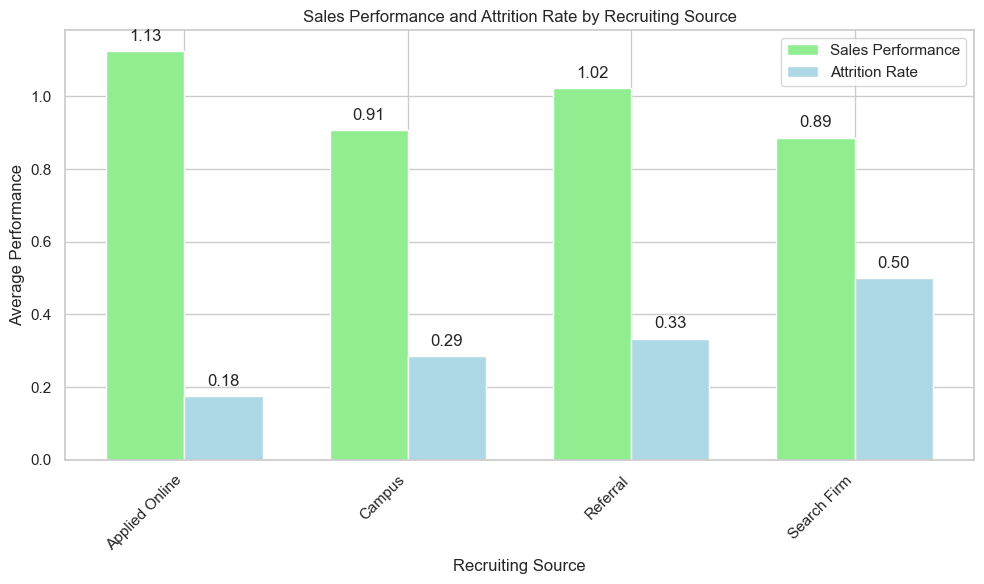

In [ ]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import numpy as np

# Data
recruiting_source = ['Applied Online', 'Campus', 'Referral', 'Search Firm']
attrition = [0.176119, 0.285714, 0.333333, 0.5]
sales_performance = [1.125609, 0.908035, 1.023198, 0.886960]

# Setting the width of the bars
bar_width = 0.35

# Creating the bar plot
fig, ax = plt.subplots(figsize=(10, 6))

# Position for each bar
x = np.arange(len(recruiting_source))

# Plotting sales performance bars
sales_bars = ax.bar(x, sales_performance, width=bar_width, label='Sales Performance', color='lightgreen')

# Plotting attrition rate bars
attrition_bars = ax.bar(x + bar_width, attrition, width=bar_width, label='Attrition Rate', color='lightblue')

# Annotating bars with values
for i, sales in enumerate(sales_performance):
    ax.text(i, sales + 0.02, f'{sales:.2f}', ha='center', va='bottom')

for i, attr in enumerate(attrition):
    ax.text(i + bar_width, attr + 0.02, f'{attr:.2f}', ha='center', va='bottom')

# Adding labels and title
ax.set_xlabel('Recruiting Source')
ax.set_ylabel('Average Performance')
ax.set_title('Sales Performance and Attrition Rate by Recruiting Source')
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(recruiting_source)
ax.legend()

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Save the plot as an image
plt.savefig('sales_attrition_comparison.png')

# Displaying the plot
plt.tight_layout()
plt.show()
